- Multiple Linear Regression using Sci-Kit learn
- Experimenting with different models 
- Implementing feature selection using f_regression
- Validating MLR assumptions

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn import metrics
import seaborn as sns
from sklearn.feature_selection import f_regression
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

In [179]:
## Import Dataset ###
df = pd.read_csv(r'.\Datasets\car-price-prediction\CarPrice_Details.csv')
print(df.shape)
df.head(3)

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [180]:
## Investigate the dataframe for any null values ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [181]:
numerical_cols = df.select_dtypes(include=['int64']).columns[1:]

### Select all categorical data types and checking their distinct values ###
categorical = df.select_dtypes(include=['object']).columns
categorical

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [182]:
for col in categorical:    
    print(col, " : ", df[col].unique()[:10])

CarName  :  ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i']
fueltype  :  ['gas' 'diesel']
aspiration  :  ['std' 'turbo']
doornumber  :  ['two' 'four']
carbody  :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel  :  ['rwd' 'fwd' '4wd']
enginelocation  :  ['front' 'rear']
enginetype  :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber  :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem  :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [183]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [184]:
## Converting categorical variables to dummy variables ##
df_dummies = pd.get_dummies(df[categorical[1:]], drop_first=True)
df_dummies.head(2)

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [185]:
#columns that can be dropped now
categorical = list(categorical)
categorical.append('car_ID')
df.drop(categorical, axis=1, inplace=True)
df.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [186]:
## Final dataset ###
df = pd.concat([df, df_dummies], axis=1)
print(df.shape)
df.head(2)

(205, 44)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0


Let's see the distribution of the price using a histogram plot and see if there are any outliers in the data using boxplot.

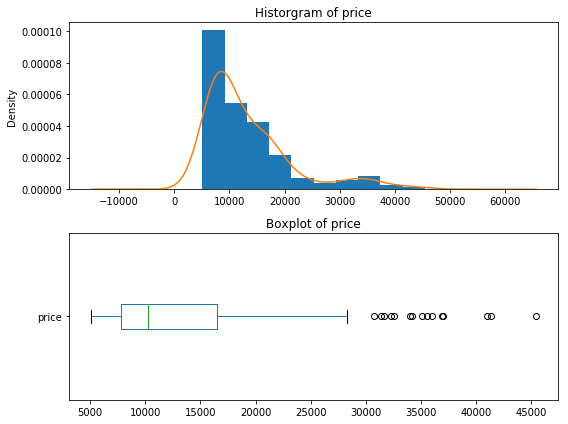

In [187]:
## Plot for price ##
plt.figure(figsize = (8, 6))
plt.subplot(2, 1, 1)
df.price.plot.hist(bins = 10, normed = True)
df.price.plot.kde(title = "Historgram of price")

plt.subplot(2, 1, 2)
df.price.plot.box(vert = False, title = "Boxplot of price")

plt.tight_layout()

As we can see the distribution for price is positively skewed and there are outliers present in the dataset. That needs to be handled. But, first we will create default model and will ignore the outliers for now.

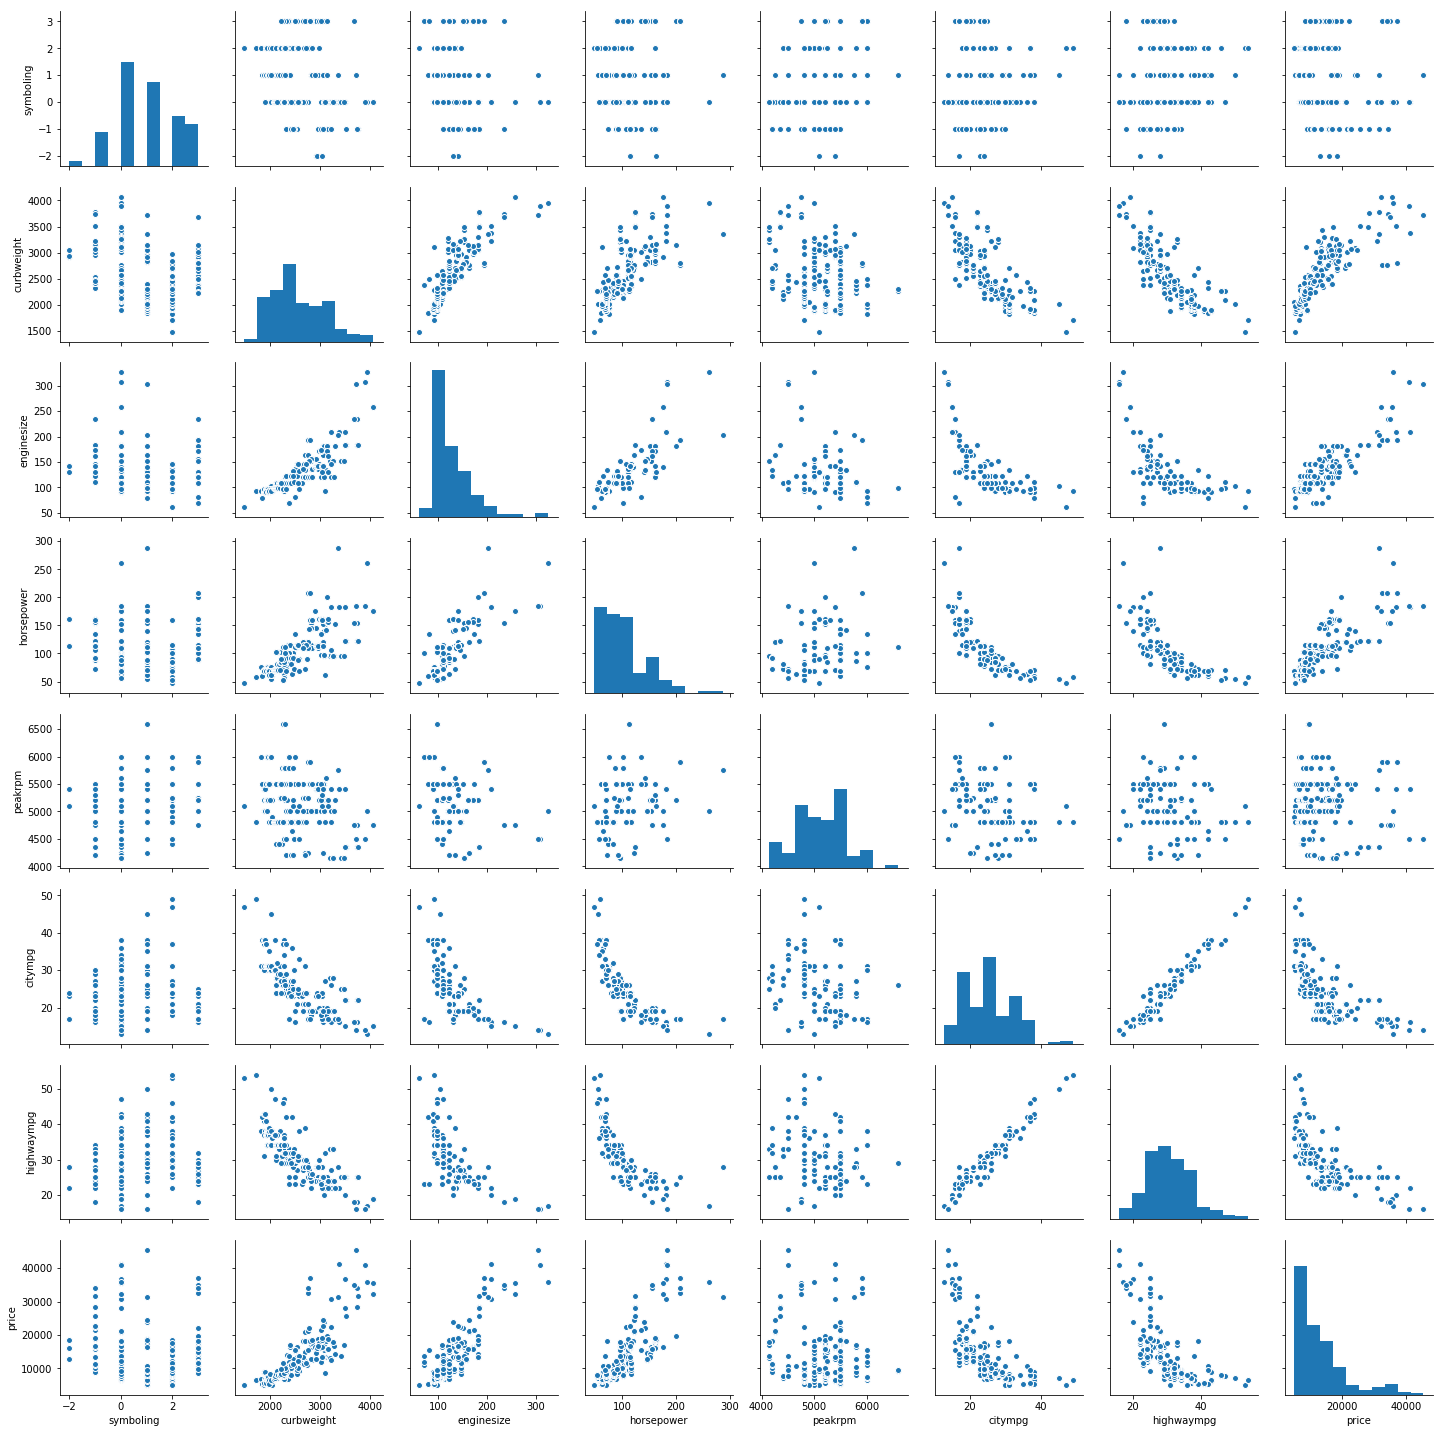

In [121]:
numerical_cols = list(numerical_cols)
numerical_cols.append('price')
sns.pairplot(df[numerical_cols])

In [188]:
### Correlation matrix
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,-0.187445,0.100413,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,-0.183473,0.153516,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,...,-0.143903,0.187964,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,...,-0.111081,0.335555,-0.184762,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,...,-0.108774,0.054482,0.000127,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,...,-0.050450,-0.110878,-0.000187,-0.234866,-0.000162,0.241829,0.144263,-0.110280,0.251259,-0.005688
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,...,-0.011354,0.023986,-0.026436,-0.183384,-0.022838,0.984356,-0.055528,-0.311035,-0.153726,-0.016654


In [189]:
y = df['price'].values
X = df[df.columns[~df.columns.isin(['price'])]].values
X_cols = df.columns[~df.columns.isin(['price'])]
X_org = df[df.columns[~df.columns.isin(['price'])]]

In [190]:
## Normalize the features using Z-score ###
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [191]:
## Train Test Split ###
X_train,X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state =100)
print("Train Size: ", X_train.shape, y_train.shape)
print("Test Size: ", X_test.shape, y_test.shape)

Train Size:  (164, 43) (164,)
Test Size:  (41, 43) (41,)


### Fitting Baseline/default Multiple Regression Model

In [192]:
### Fitting Linear Regression Default Model ###
model_default = LinearRegression()
model_default.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [193]:
## Model intercept & coefficients ##
model_default.intercept_, model_default.coef_

(13499.308637422086,
 array([ 1.88757630e+02,  5.70591241e+02, -2.70530639e+02,  1.38545093e+03,
         8.98021275e+01,  1.02775082e+03,  8.77236111e+03, -2.38793278e+03,
        -2.51210633e+03, -7.84281198e+02,  1.57975023e+03,  7.71217119e+02,
        -7.23683257e+02,  1.02541425e+03, -5.76092660e+02,  6.88793312e+02,
         7.57567735e+01, -8.86438264e+02, -1.43424292e+03, -9.95668316e+02,
        -8.30650611e+02, -1.70244110e+02,  4.43629940e+02,  8.06242201e+02,
        -9.90335389e+01,  1.54376437e+02,  2.59211155e+03,  9.44442727e+02,
        -8.38135262e+02,  1.15301327e+03, -5.69130717e+01,  1.12406328e+03,
        -1.07140200e+02,  1.02894407e+03, -1.58671287e+03,  1.15301327e+03,
        -1.83399665e+02, -7.91523306e+00,  5.76092660e+02, -2.74876917e+02,
        -1.91476377e+02, -6.52893032e+02,  2.74756107e-26]))

In [194]:
## Predicting Test Set ###
y_test_pred = model_default.predict(X_test)

n = X_test.shape[0]; p= X_test.shape[1]
r2_score = metrics.regression.r2_score(y_test, y_test_pred)
Adj_r2_score = 1-(1-r2_score)*(n-1)/(n-p-1)

## Measuring Model Performance ##
print("###  Test Performance ###")
print("r2_score: ",r2_score)
print("Adj_r2_score: ",Adj_r2_score)
print("mean_squared_error: ",metrics.regression.mean_squared_error(y_test, y_test_pred))
print("root_mean_squared_error: ",np.sqrt(metrics.regression.mean_squared_error(y_test, y_test_pred)))

###  Test Performance ###
r2_score:  0.8258399367911008
Adj_r2_score:  3.3221341761186562
mean_squared_error:  13417078.759525191
root_mean_squared_error:  3662.9330814970112


In [195]:
## Predicting Training Set ###
y_train_pred = model_default.predict(X_train)

n = X_train.shape[0]; p= X_train.shape[1]
r2_score = metrics.regression.r2_score(y_train, y_train_pred)
Adj_r2_score = 1-(1-r2_score)*(n-1)/(n-p-1)

## Measuring Model Performance ##
print("###  Train Performance  ###")
print("r2_score: ",r2_score)
print("Adj_r2_score: ",Adj_r2_score)
print("mean_squared_error: ",metrics.regression.mean_squared_error(y_train, y_train_pred))
print("root_mean_squared_error: ",np.sqrt(metrics.regression.mean_squared_error(y_train, y_train_pred)))

###  Train Performance  ###
r2_score:  0.9470943449129318
Adj_r2_score:  0.928136485173399
mean_squared_error:  3110802.5545715783
root_mean_squared_error:  1763.7467376501588


Baseline model or default model is not giving good result.
Train R2 score = 94% whereas Test R2 score = 82%
Train Adj R2 score = 92% whereas Test Adj R2 score = 3%
After validating all the linear regression assumptions we are confident that we can improve from this baseline performance

In [196]:
## Inverse transform to bring values to original scale ##
X_test_inv = scaler.inverse_transform(X_test)

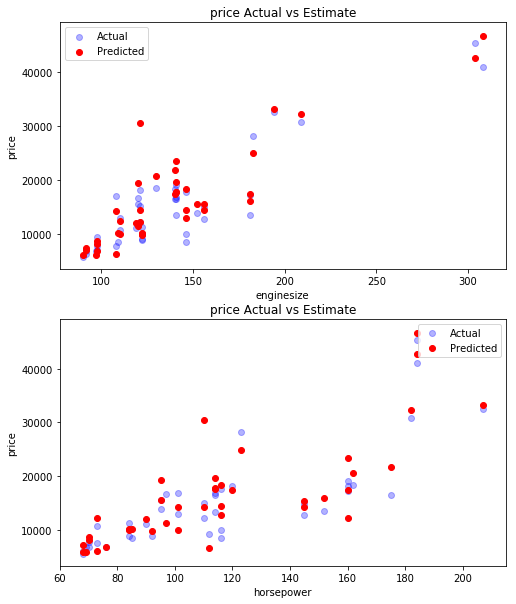

In [197]:
## Plot for enginesize ##
plt.figure(figsize = (8, 10))
plt.subplot(2, 1, 1)

plt.scatter(X_test_inv[:, 6], y_test, alpha = 0.3, c = "blue", label = "Actual")
plt.scatter(X_test_inv[:, 6], y_test_pred, c = "red", label = "Predicted")

plt.xlabel("enginesize")
plt.ylabel("price")
plt.title("price Actual vs Estimate")
plt.legend()


plt.subplot(2, 1, 2)
## Plot for horsepower ##
plt.scatter(X_test_inv[:, 10], y_test, alpha = 0.3, c = "blue", label = "Actual")
plt.scatter(X_test_inv[:, 10], y_test_pred, c = "red", label = "Predicted")

plt.xlabel("horsepower")
plt.ylabel("price")
plt.title("price Actual vs Estimate")
plt.legend()

### Significance Scores for feature selection

p-value indicates the significant scores for each feature. p-value < 0.05 indicates, the corresponding feature is statistically significant. We can rebuild the model excluding the non-significant features one by one until all remaining features are significant. 


We can also evaluate feature significance using correlation.

+1             => Perfect positive correlation

-1             => Perfect negative correlation

0              => No Correlation

0 to 0.25      => Weak positive correlation

0.25 to 0.75   => Moderate positive correlation

0.75 to 1      => Strong positive correlation

-0.25 to 0     => Weak negative correlation

-0.25 to -0.75 => Moderate negative correlation

-0.75 to -1    => Strong negative correlation

In [198]:
_, p_vals = f_regression(X_train, y_train)
selected_features = pd.DataFrame({"feature": X_cols, "p_value": p_vals})
selected_features.loc[selected_features['p_value']<0.05, 'Significance_pval'] = 'Significant'
selected_features.loc[selected_features['p_value']>=0.05, 'Significance_pval'] = 'Not Significant'

price_corr = df.corr()['price']
strong_corr = list(price_corr[np.abs(price_corr)>0.75].index)
moderate_corr = list(price_corr[(np.abs(price_corr)>=0.25) & (np.abs(price_corr)<0.75)].index)
weak_corr = list(price_corr[(np.abs(price_corr)>0) & (np.abs(price_corr)<0.25)].index)

selected_features.loc[selected_features['feature'].isin(strong_corr), 'Significance_corr'] = 'Strong'
selected_features.loc[selected_features['feature'].isin(moderate_corr), 'Significance_corr'] = 'Moderate'
selected_features.loc[selected_features['feature'].isin(weak_corr), 'Significance_corr'] = 'Weak'

In [199]:
selected_features

,feature,p_value,Significance_pval,Significance_corr
0,symboling,3.179178e-01,Not Significant,Weak
1,wheelbase,1.818419e-15,Significant,Moderate
2,carlength,5.565668e-24,Significant,Moderate
3,carwidth,2.151810e-32,Significant,Strong
4,carheight,4.145047e-01,Not Significant,Weak
5,curbweight,5.744911e-46,Significant,Strong
6,enginesize,6.583867e-50,Significant,Strong
7,boreratio,5.010204e-14,Significant,Moderate
8,stroke,1.661347e-01,Not Significant,Weak
9,compressionratio,2.312458e-01,Not Significant,Weak


In [200]:
imp_features = selected_features.loc[(selected_features['Significance_pval'] == 'Significant') & (selected_features['Significance_corr'].isin(['Strong', 'Moderate'])), 'feature']
imp_features

1               wheelbase
2               carlength
3                carwidth
5              curbweight
6              enginesize
7               boreratio
10             horsepower
12                citympg
13             highwaympg
18      carbody_hatchback
21         drivewheel_fwd
22         drivewheel_rwd
23    enginelocation_rear
26         enginetype_ohc
28        enginetype_ohcv
31    cylindernumber_four
32     cylindernumber_six
36        fuelsystem_2bbl
40        fuelsystem_mpfi
Name: feature, dtype: object

### Model 2 => Selecting imp features 

In [201]:
X_train1 = X_train[:,imp_features.index]
X_test1 = X_test[:,imp_features.index]

In [202]:
### Fitting Linear Regression Model on selected features ###
model = LinearRegression()
model.fit(X_train1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [203]:
## Predicting Test Set ###
y_test_pred = model.predict(X_test1)

n = X_test1.shape[0]; p= X_test1.shape[1]
r2_score = metrics.regression.r2_score(y_test, y_test_pred)
Adj_r2_score = 1-(1-r2_score)*(n-1)/(n-p-1)

## Measuring Model Performance ##
print("###  Test Performance Improved ###")
print("r2_score: ",r2_score)
print("Adj_r2_score: ",Adj_r2_score)
print("mean_squared_error: ",metrics.regression.mean_squared_error(y_test, y_test_pred))
print("root_mean_squared_error: ",np.sqrt(metrics.regression.mean_squared_error(y_test, y_test_pred)))

###  Test Performance Improved ###
r2_score:  0.8304464167607438
Adj_r2_score:  0.6770407938299883
mean_squared_error:  13062201.163490202
root_mean_squared_error:  3614.1667315565564


In [204]:
## Predicting Training Set ###
y_train_pred = model.predict(X_train1)

n = X_train1.shape[0]; p= X_train1.shape[1]
r2_score = metrics.regression.r2_score(y_train, y_train_pred)
Adj_r2_score = 1-(1-r2_score)*(n-1)/(n-p-1)
## Measuring Model Performance ##
print("###  Train Performance  ###")
print("r2_score: ",r2_score)
print("Adj_r2_score: ",Adj_r2_score)
print("mean_squared_error: ",metrics.regression.mean_squared_error(y_train, y_train_pred))
print("root_mean_squared_error: ",np.sqrt(metrics.regression.mean_squared_error(y_train, y_train_pred)))

###  Train Performance  ###
r2_score:  0.8992196618492957
Adj_r2_score:  0.8859222561210778
mean_squared_error:  5925788.705457863
root_mean_squared_error:  2434.2942931079356


### Model 3 => Selecting imp features

In [208]:
feature_set = selected_features.loc[(selected_features['Significance_pval'] == 'Significant'), 'feature']

X_train2 = X_train[:,feature_set.index]
X_test2 = X_test[:,feature_set.index]

### Fitting Linear Regression Model on selected features ###
model2 = LinearRegression()
model2.fit(X_train2, y_train)

## Predicting Test Set ###
y_test_pred = model2.predict(X_test2)

n = X_test2.shape[0]; p= X_test2.shape[1]
r2_score = metrics.regression.r2_score(y_test, y_test_pred)
Adj_r2_score = 1-(1-r2_score)*(n-1)/(n-p-1)

## Measuring Model Performance ##
print("###  Test Performance Improved ###")
print("r2_score: ",r2_score)
print("Adj_r2_score: ",Adj_r2_score)
print("mean_squared_error: ",metrics.regression.mean_squared_error(y_test, y_test_pred))
print("root_mean_squared_error: ",np.sqrt(metrics.regression.mean_squared_error(y_test, y_test_pred)))


## Predicting Training Set ###
y_train_pred = model2.predict(X_train2)

n = X_train2.shape[0]; p= X_train2.shape[1]
r2_score = metrics.regression.r2_score(y_train, y_train_pred)
Adj_r2_score = 1-(1-r2_score)*(n-1)/(n-p-1)
## Measuring Model Performance ##
print("                     ")
print("###  Train Performance  ###")
print("r2_score: ",r2_score)
print("Adj_r2_score: ",Adj_r2_score)
print("mean_squared_error: ",metrics.regression.mean_squared_error(y_train, y_train_pred))
print("root_mean_squared_error: ",np.sqrt(metrics.regression.mean_squared_error(y_train, y_train_pred)))

###  Test Performance Improved ###
r2_score:  0.8780307644861007
Adj_r2_score:  0.6950769112152518
mean_squared_error:  9396361.077144142
root_mean_squared_error:  3065.3484430230997
                     
###  Train Performance  ###
r2_score:  0.9117624306221114
Adj_r2_score:  0.8965271668446342
mean_squared_error:  5188285.747113191
root_mean_squared_error:  2277.7808821555227


### Checking assumptions of Multiple Linear Regression (Model 3)

1. Linear relationship between Target variables and predictors.
2. No Multicollinearity => Predictors should not be correlated with each other. It should be checked using VIF. 

   If VIF <= 4 ---> No Multicollinearity
   If VIF >=10 ---> Serious Multicollinearity
   
   
3. No Autocorrelation => There should be no auto-correlation among error terms. It should be checked using Durbin-Watson test.

   If DW = 2 ---> No Autocorrelation
   If 0 < DW < 2 ---> Positive Autocorrelation
   If 2 < DW < 4 ---> Negative Autocorrelation
   
   
4. No Hetroskedascity => Errors must have a constant variance. It should be checked using residual vs fitted plot. 
   If it  exhibits a funnel shape pattern =>  Hetroskedascity is there
   It can also be checked using White general test
   
5. Error terms must be normally distributed. It can be checked using Shapiro-Wilk test or by checking Q-Q plot

Durbin Watson Coefficient is  1.8409902315019555


((array([-2.12570479, -1.74291212, -1.51528984, -1.34678628, -1.20968671,
         -1.09219094, -0.98810906, -0.89376191, -0.80676941, -0.72549338,
         -0.64875081, -0.57565335, -0.50551158, -0.43777469, -0.37199083,
         -0.30778002, -0.24481487, -0.18280651, -0.12149384, -0.06063494,
          0.        ,  0.06063494,  0.12149384,  0.18280651,  0.24481487,
          0.30778002,  0.37199083,  0.43777469,  0.50551158,  0.57565335,
          0.64875081,  0.72549338,  0.80676941,  0.89376191,  0.98810906,
          1.09219094,  1.20968671,  1.34678628,  1.51528984,  1.74291212,
          2.12570479]),
  array([-7.29617991e+03, -4.69923769e+03, -4.57173485e+03, -4.19091514e+03,
         -3.74857189e+03, -3.47297016e+03, -3.33062731e+03, -2.90235736e+03,
         -2.73852181e+03, -2.73139906e+03, -2.55989659e+03, -2.44730345e+03,
         -2.22179651e+03, -1.23485327e+03, -1.08708567e+03, -1.04452440e+03,
         -1.01777796e+03, -8.54205748e+02, -8.00251511e+02, -7.94818117e+02,

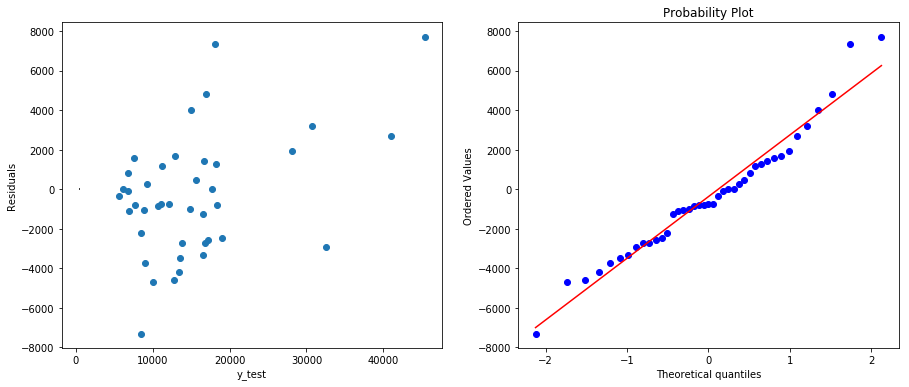

In [215]:
residuals_test = y_test - y_test_pred

#Durbin Watson test for checking autocorrelation
print("Durbin Watson Coefficient is ", durbin_watson(residuals_test))

# Checking for Hetroskedescity
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals_test)
plt.xlabel("y_test")
plt.ylabel("Residuals")
plt.hlines([0], xmin = 420, xmax = 500, linestyles = "dashed")

plt.subplot(1, 2, 2)
## Q-Q plot for checking residuals are normally distributed or not
stats.probplot(residuals_test, plot=plt)

Residual plots is random showing no presence of hetroskedescity. 
qqPlot shows that residuals exhibit normality, indicating model is closely linear.
Also, Durbin Watson results(1.84) indicate small positive autocorrelation among residuals